In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq
from scipy.signal import windows
from scipy.fft import fftshift

In [117]:
# Read the CSV file
df = pd.read_csv('radar/radar_rotate.csv')
df.head()

,node,data,timestamp
0,radar,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2025-04-24 18:01:50.709287
1,radar,"[402, 283, 312, 384, -169, -119, -87, -23, 389...",2025-04-24 18:01:50.751306
2,radar,"[366, 302, 342, 359, -166, -104, -31, -24, 365...",2025-04-24 18:01:50.797009
3,radar,"[386, 284, 317, 371, -128, -58, -88, 4, 349, 2...",2025-04-24 18:01:50.843099
4,radar,"[363, 267, 293, 351, -101, -54, -49, -37, 299,...",2025-04-24 18:01:50.873531


In [118]:
# read the data column from first row and convert array string to numpy array
data0 = np.array(eval(df.iloc[0, 1]))
data1 = np.array(eval(df.iloc[1, 1]))
data2 = np.array(eval(df.iloc[2, 1]))
dataf0 = np.array(eval(df.iloc[-1, 1]))
dataf1 = np.array(eval(df.iloc[-2, 1]))
dataf2 = np.array(eval(df.iloc[-3, 1]))
print("Data shape:", data0.shape)
print("data0", data0)
print("data1", data1)
print("data2", data2)
print("dataf0", dataf0)
print("dataf1", dataf1)
print("dataf2", dataf2)

Data shape: (2048,)
data0 [   0    0    0 ... -124  -52 -372]
data1 [ 402  283  312 ...    6   50 -421]
data2 [ 366  302  342 ...  -14  115 -399]
dataf0 [ -23  -41   19 ...  -69   45 -157]
dataf1 [  -6  -43   48 ...   59   82 -140]
dataf2 [ -16  -24   51 ...   17   45 -128]


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_14692/1229057847.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


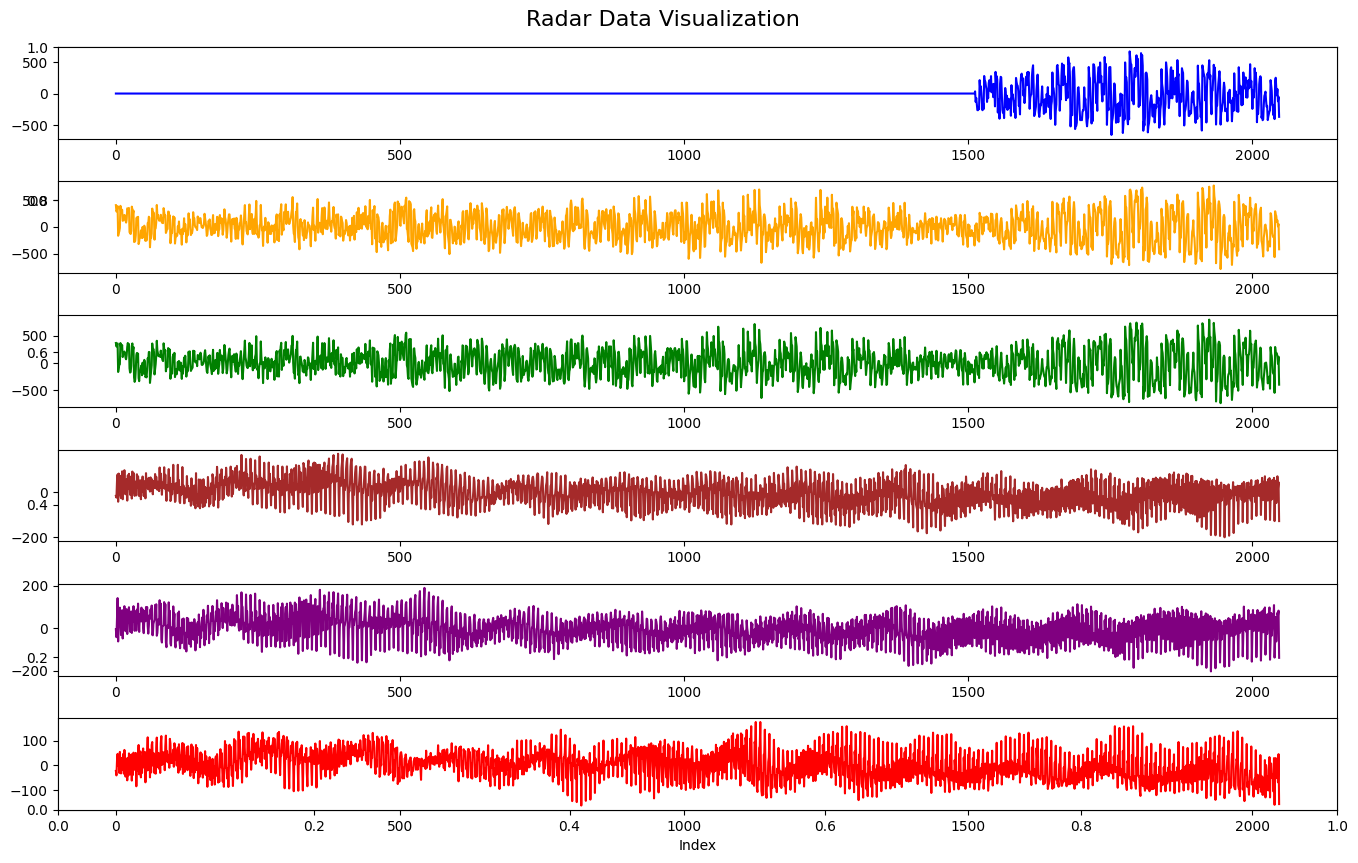

In [119]:
# plot data0, data1, data2, and dataf on subpolots vertically
plt.figure(figsize=(14, 9))
plt.suptitle('Radar Data Visualization', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Index')

plt.subplot(6, 1, 1)
plt.plot(data0, label='Data 0', color='blue')

plt.subplot(6, 1, 2)
plt.plot(data1, label='Data 1', color='orange')

plt.subplot(6, 1, 3)
plt.plot(data2, label='Data 2', color='green')

plt.subplot(6, 1, 4)
plt.plot(dataf2, label='Data Final 2', color='brown')

plt.subplot(6, 1, 5)
plt.plot(dataf1, label='Data Final 1', color='purple')

plt.subplot(6, 1, 6)
plt.plot(dataf0, label='Data Final 0', color='red')

plt.tight_layout()


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_14692/1069867318.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


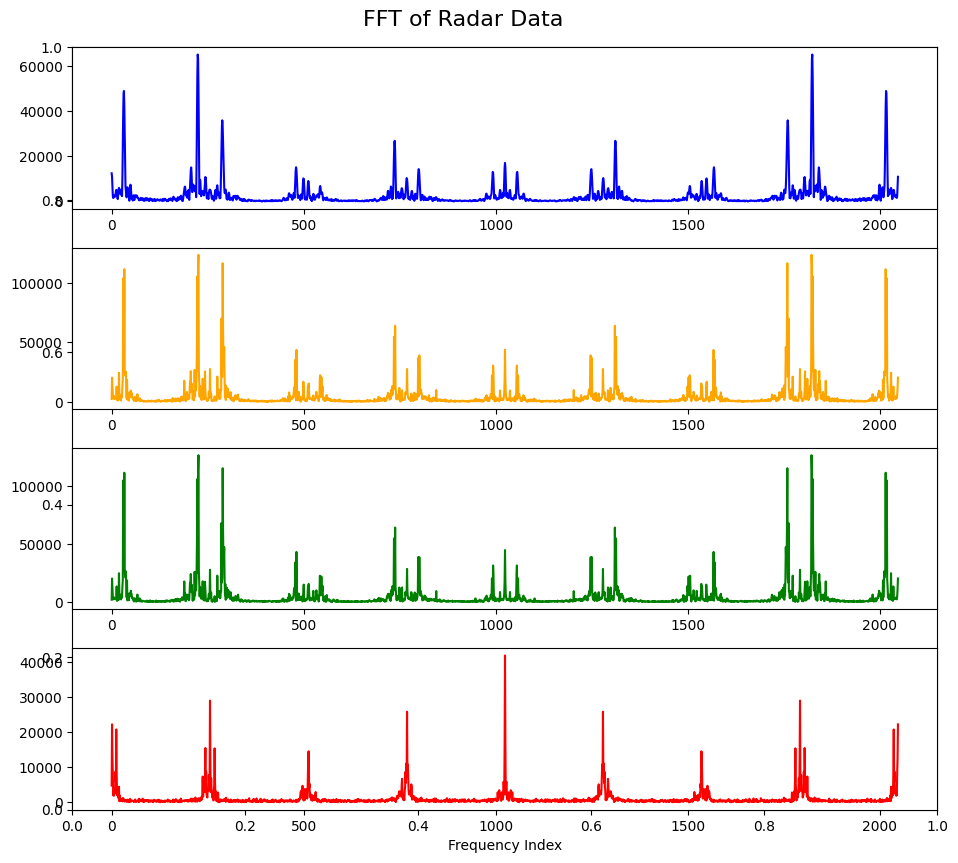

In [120]:
# Do FFT on data0, data1, data2, and dataf
fft_data0 = fft(data0)
fft_data1 = fft(data1)
fft_data2 = fft(data2)
fft_dataf = fft(dataf0)

# Plot the FFT results
plt.figure(figsize=(10, 9))
plt.suptitle('FFT of Radar Data', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Frequency Index')

plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_data0), label='FFT Data 0', color='blue')
plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_data1), label='FFT Data 1', color='orange')
plt.subplot(4, 1, 3)
plt.plot(np.abs(fft_data2), label='FFT Data 2', color='green')
plt.subplot(4, 1, 4)
plt.plot(np.abs(fft_dataf), label='FFT Data Final', color='red')

plt.tight_layout()

In [132]:
len(eval(df['data'][0]))

2048

In [133]:
ADC_SAMPLING_RATE = 10000  # Hz, TODO

# FFT on all data streams in pandas
ffts = df.iloc[:, 1].apply(lambda x: fft(np.array(eval(x)))).values
ffts = np.vstack([np.abs(f) for f in ffts]).T  # Shape: (fft_len, num_samples)

# freq vals
freqs = fftfreq(len(data0), 1/ADC_SAMPLING_RATE)

# timestamps in sec
timestamps = pd.to_datetime(df.iloc[:, 2])
tds = (timestamps - timestamps.iloc[0]).dt.total_seconds().values

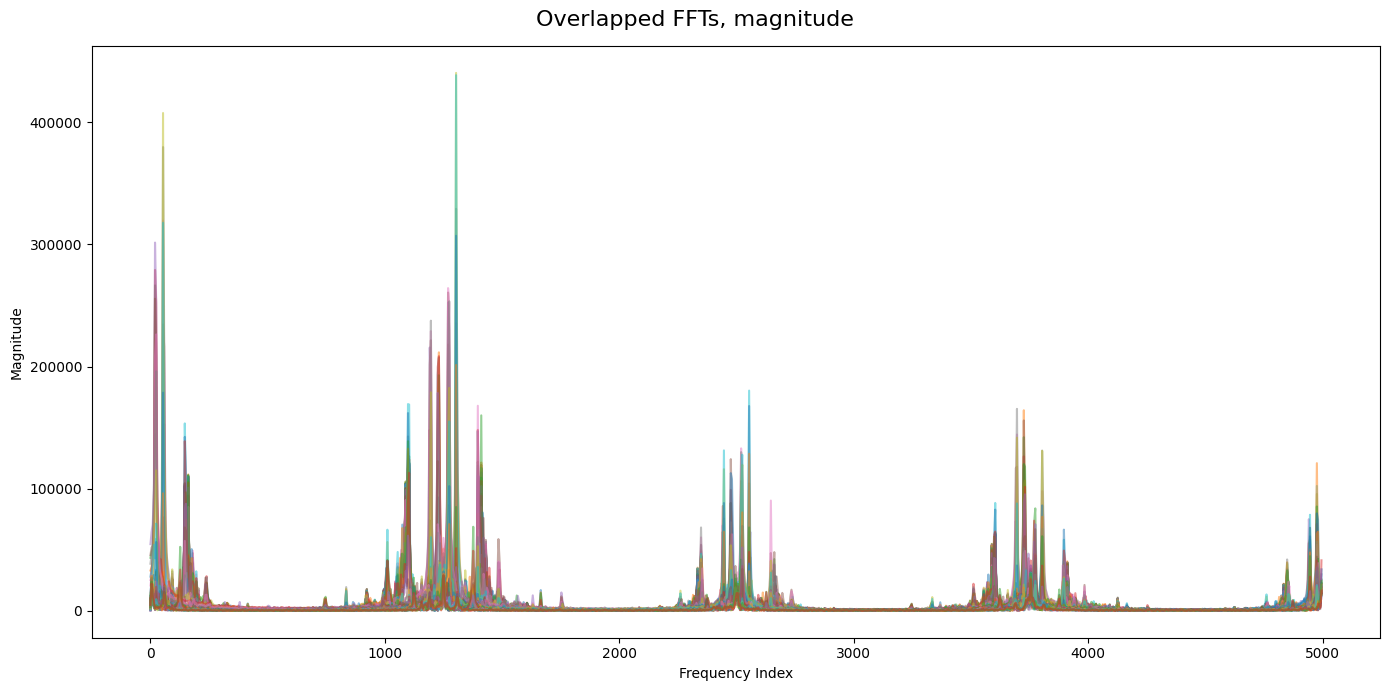

In [134]:
plt.figure(figsize=(14, 7))
plt.suptitle('Overlapped FFTs, magnitude', fontsize=16)
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
for i in range(ffts.shape[1]):
    plt.plot(freqs[:len(freqs)//2], np.abs(ffts[:len(freqs)//2, i]), label=f'Sample {i+1}', alpha=0.5)
plt.tight_layout()

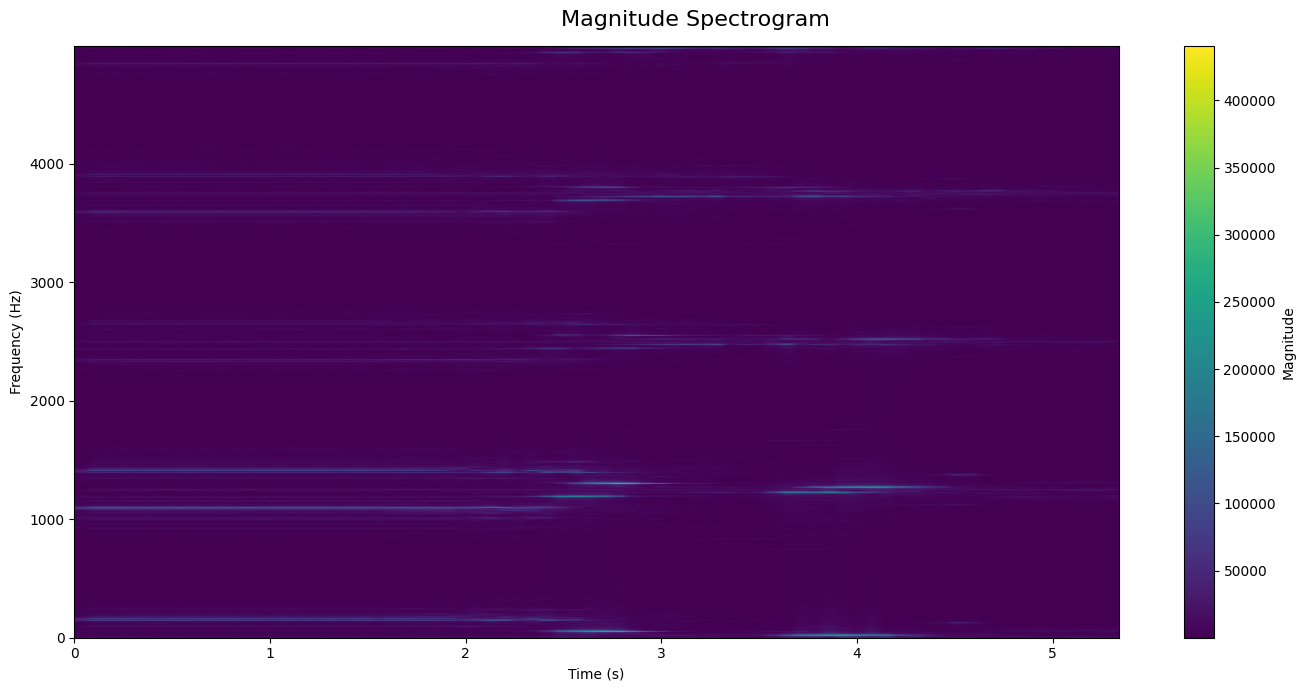

In [135]:
plt.figure(figsize=(14, 7))
plt.suptitle('Magnitude Spectrogram', fontsize=16)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
extent = [0, tds[-1], 0, max(freqs)]
plt.imshow(np.abs(ffts[:len(freqs)//2, :]), aspect='auto', extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.tight_layout()

In [77]:
# read adc_data.bin file

adc_data = np.fromfile('./adc_data_no_test_source.bin')
adc_data

array([-2.60315586e-255, -5.03737707e+238, -3.00275740e-255, ...,
       -3.73501559e+238, -1.83437727e-255, -4.87454897e+238])

In [78]:
len(adc_data)

524288

In [79]:
start_freq = 77.5 
end_freq = 80.5
num_samples = 256
sample_rate = 10
start_time = 6

duration = (num_samples) / sample_rate
slope = (end_freq - start_freq)*1000 / duration
actual_start = start_freq - start_time * slope / 1000
actual_end = slope * 60 / 1000 + actual_start
 

# frame config
NUM_FRAMES = 8
NUM_CHIRP = 128             # chirp loop count
PERIODICITY = 40            # periodicity in ms

# profile config
FREQUENCY = 77              # start frequency
SAMPLES_PER_CHIRP = 256     # ADC number of samples
SAMPLE_RATE = 10000         # digout sample rate in Hz

SAMPLE_RATE_KHZ = SAMPLE_RATE / 1000  # sample rate in kHz

# chirp config
SWEEP_TIME = SAMPLES_PER_CHIRP / SAMPLE_RATE_KHZ  # chirp time in seconds
NUMRX = 4

# ChanNAdcConfig


c = 3e8  # Speed of light in m/s



def load_radar_file(filepath, aperture_type='normal'):
    """
    Load raw radar files for processing (Note: this function is only needed when processing raw radar data into an image)

    Returns: 
        Loaded complex-valued radar (adc) files for the specified radar type
    """
    fid = open(f'{filepath}', 'rb')

    adcData = np.fromfile(fid, dtype='<i2')
    numRx = 4
    adcData = np.reshape(adcData, (int(adcData.shape[0] / (numRx * 2)), numRx * 2))
    adcData = adcData[:, [0, 1, 2, 3]] + 1j * adcData[:, [4, 5, 6, 7]]

    return adcData

In [80]:
adcData = load_radar_file('./adc_data_cover.bin')
print(adcData.shape)
adcData 

(262144, 4)


array([[-21846. -4726.j,  14924.+16653.j,  -2018.-22581.j,
        -11437.+19304.j],
       [-14896.-16658.j,   2265.+22233.j,  11635.-19452.j,
        -20599. +8903.j],
       [ -2258.-22229.j, -11232.+19330.j,  20841. -8887.j,
        -21885. -4905.j],
       ...,
       [ 11495.-19168.j, -20571. +8761.j,  22036. +5357.j,
        -14592.-17035.j],
       [ 20570. -8746.j, -21791. -4995.j,  14664.+17283.j,
         -1805.-22371.j],
       [ 21783. +5015.j, -14685.-16854.j,   1713.+22598.j,
         11688.-19145.j]])

In [81]:
# reshape adcData to (num samples per chirp, num chirps, num frames, num rx)
chirps = adcData.reshape(SAMPLES_PER_CHIRP, NUM_CHIRP, NUM_FRAMES, NUMRX)
print("Chirps shape:", chirps.shape)

Chirps shape: (256, 128, 8, 4)


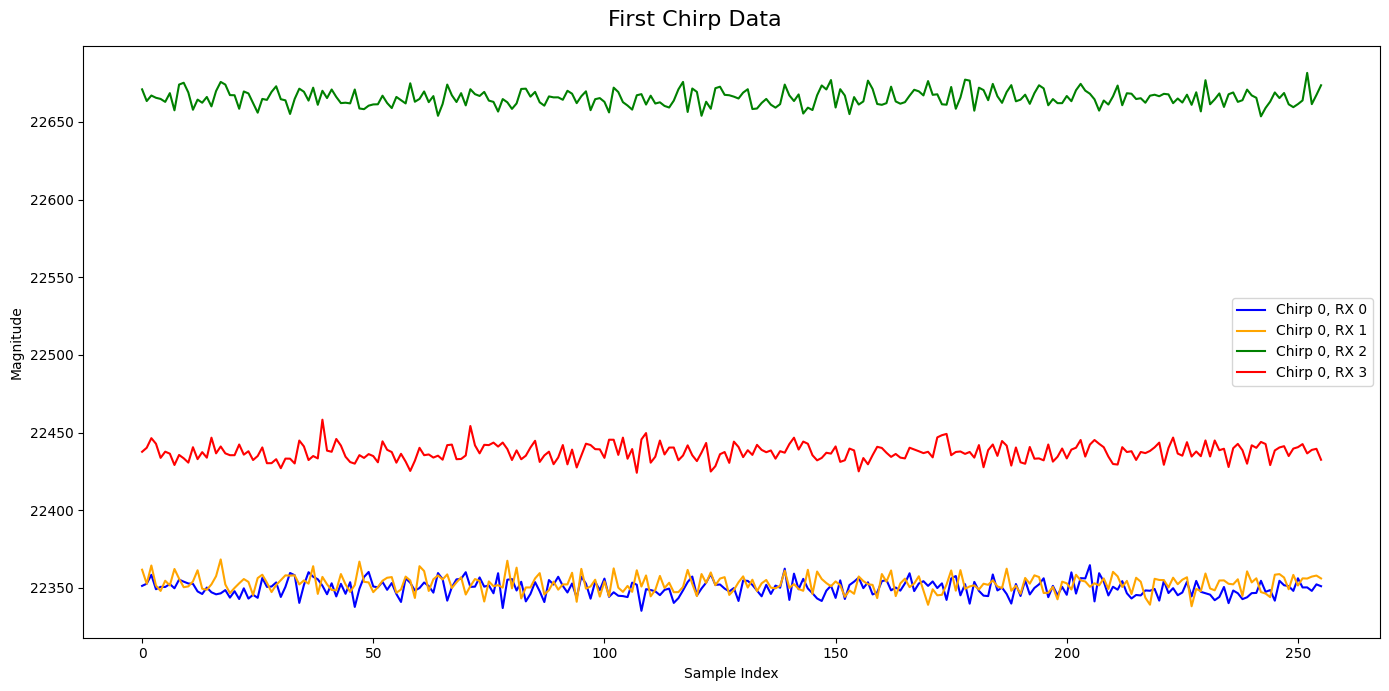

In [82]:
# plot the first chirp
plt.figure(figsize=(14, 7))
plt.suptitle('First Chirp Data', fontsize=16)
plt.plot(np.abs(chirps[:, 0, 0, 0]), label='Chirp 0, RX 0', color='blue')
plt.plot(np.abs(chirps[:, 0, 0, 1]), label='Chirp 0, RX 1', color='orange')
plt.plot(np.abs(chirps[:, 0, 0, 2]), label='Chirp 0, RX 2', color='green')
plt.plot(np.abs(chirps[:, 0, 0, 3]), label='Chirp 0, RX 3', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

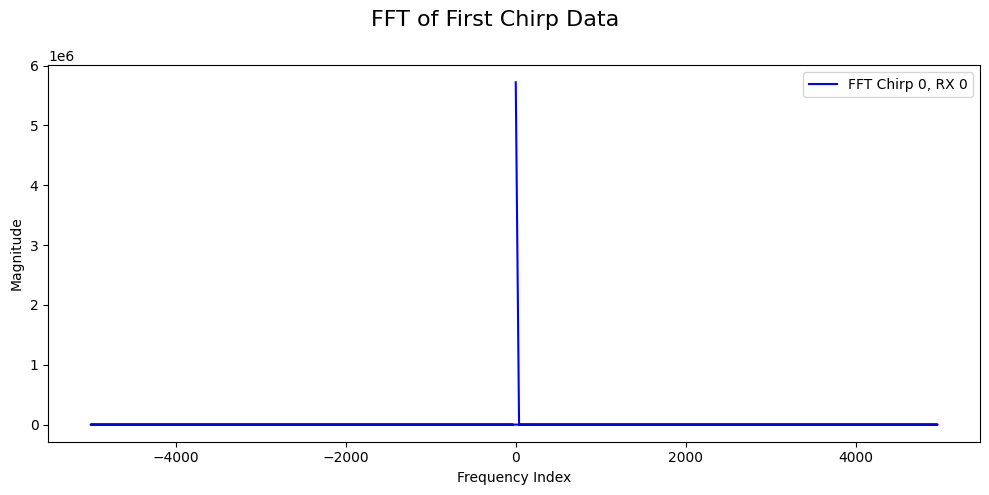

In [83]:
# FFT on the first chirp
fft_chirp0 = fft(chirps[:, 0, 0, 0])
freqs_chirp0 = fftfreq(len(fft_chirp0), 1/SAMPLE_RATE)
plt.figure(figsize=(10, 5))
plt.suptitle('FFT of First Chirp Data', fontsize=16)
plt.plot(freqs_chirp0, np.abs(fft_chirp0), label='FFT Chirp 0, RX 0', color='blue')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

/opt/miniconda3/envs/6205/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/miniconda3/envs/6205/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


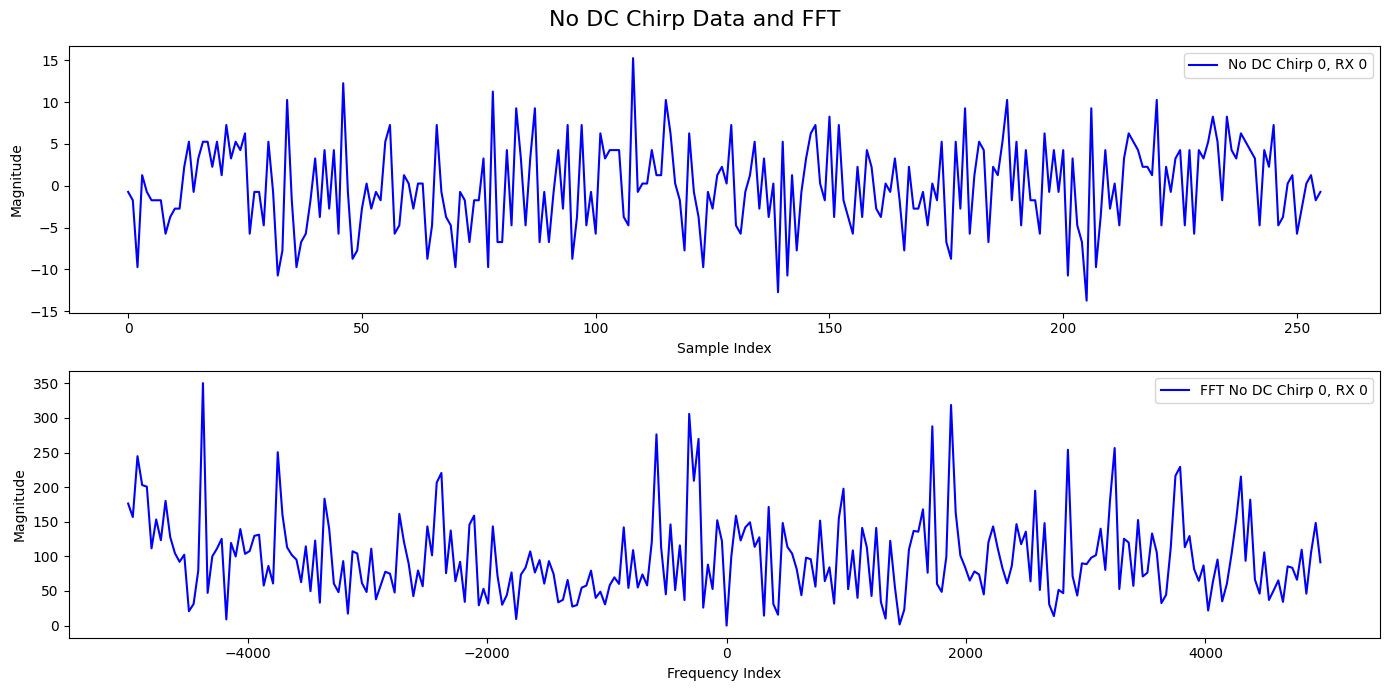

In [84]:
# remove dc offset
chirp = chirps[:, 0, 0, 0]
chirp -= np.mean(chirp)
fft_chirp0 = fft(chirp)

fft_chirp0_shifted = fftshift(fft_chirp0)
freqs_chirp0_shifted = fftshift(fftfreq(len(fft_chirp0), 1/SAMPLE_RATE))

# Plot the No DC chirp and its FFT
plt.figure(figsize=(14, 7))
plt.suptitle('No DC Chirp Data and FFT', fontsize=16)
plt.subplot(2, 1, 1)
plt.plot(chirp, label='No DC Chirp 0, RX 0', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(freqs_chirp0_shifted, np.abs(fft_chirp0_shifted), label='FFT No DC Chirp 0, RX 0', color='blue')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

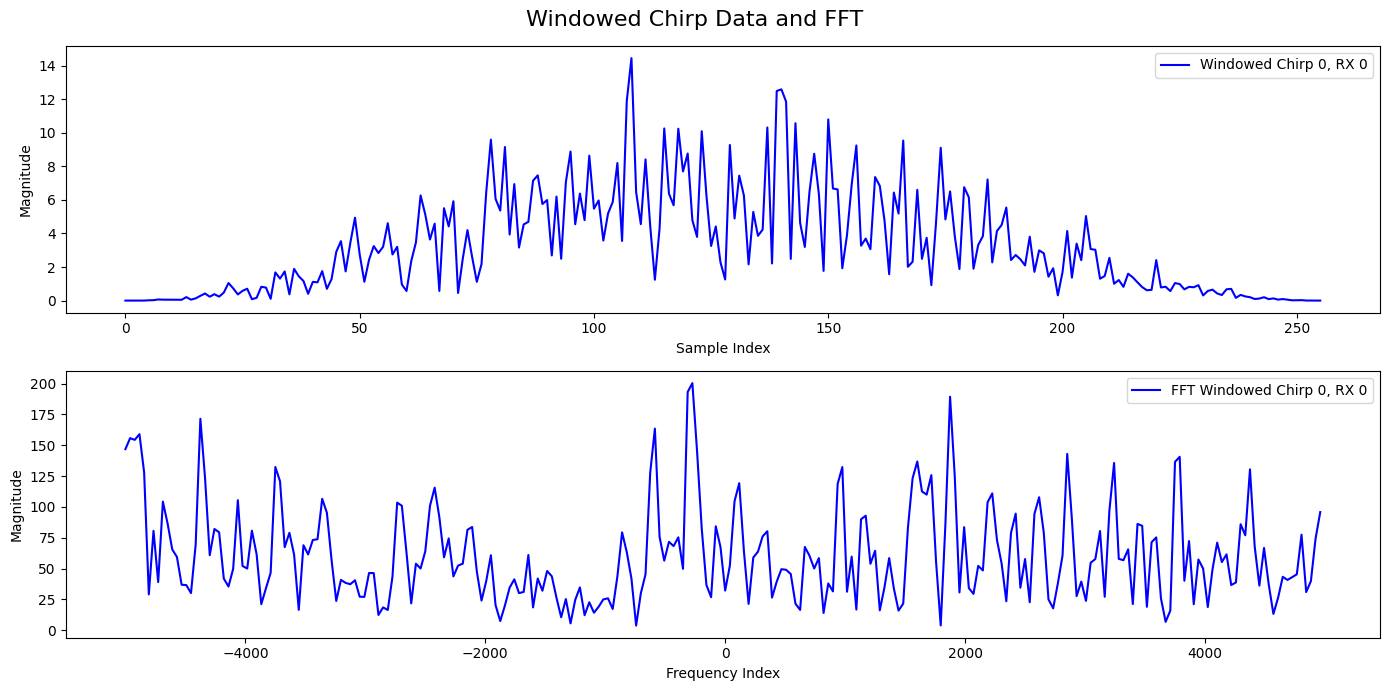

In [85]:
# hann windowing
window = windows.hann(SAMPLES_PER_CHIRP)
chirp_windowed = chirp * window
fft_chirp0 = fft(chirp_windowed)


fft_chirp0_shifted = fftshift(fft_chirp0)
freqs_chirp0_shifted = fftshift(fftfreq(len(fft_chirp0), 1/SAMPLE_RATE))

# Plot the windowed chirp and its FFT
plt.figure(figsize=(14, 7))
plt.suptitle('Windowed Chirp Data and FFT', fontsize=16)
plt.subplot(2, 1, 1)
plt.plot(np.abs(chirp_windowed), label='Windowed Chirp 0, RX 0', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(freqs_chirp0_shifted, np.abs(fft_chirp0_shifted), label='FFT Windowed Chirp 0, RX 0', color='blue')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

In [12]:
def correlate_locs_and_meas(self, radar_type, robot_data, radar_data, exp_data, robot_loc_data=None, speed="speed_8"):
        """
        Find the robot locations where each radar measurement was taken by interpolating the robot trajectory.
        Only used in real world experiments.
        Parameters:
            radar_type (str): type of radar to use ("24_ghz, 77_ghz")
            robot_data (dict): loaded robot pickle file using the load_robot_file function
            radar_data (dict): loaded radar adc file using the load_radar_files function
            robot_loc_data (dict): loaded robot location data using the load_robot_loc_files function
            speed (str): the speed of the radar ("speed_4", "speed_8")

        Returns:
            Robot locations and radar data, with one-to-one correspondences
        """
        all_locs = []
        all_radar_data = []
        all_index = []
        assert radar_type in ['77_ghz', '24_ghz'], "Please choose a valid radar type."

        aperture_type = exp_data['aperture size']

        # Load imaging parameters
        params_dict = utilities.get_radar_parameters(radar_type=radar_type, is_sim=False, aperture_type=aperture_type)
        FREQUENCY = params_dict['min_f']
        NUM_FRAMES = params_dict['num_frames']
        SWEEP_TIME = params_dict['sweep_time']
        PERIODICITY = params_dict['periodicity']
        SAMPLES_PER_CHIRP = params_dict['num_samples']
        NUM_CHIRP = params_dict['num_chirps']
        wavelength = c / FREQUENCY
        repeated_meas_threshold = wavelength * (3 / 16)

        # Create interpolation functions for robot locations
        radar_type_num = radar_type[:2]
        robot_loc_data[f'times_{radar_type_num}'] = robot_loc_data[f'times_{radar_type_num}']
        interp_functs = self.get_interpolated_funct(robot_loc_data[f'times_{radar_type_num}'], robot_loc_data[f'tx_{radar_type_num}_locs'])

        # Find robot location for every radar measurement
        for i, filename in enumerate(robot_data['all_radar_filenames']):
            # Load radar file for this row
            created_ts = robot_data['all_radar_created_ts'][i]
            if created_ts == -1: continue
            if int(filename) not in radar_data:
                print(f"Couldn't find file {int(filename)}")
                continue

            # Each radar file contains NUM_FRAMES different radar measurements
            data = radar_data[int(filename)]
            current_row_locs = []
            for j in range(NUM_FRAMES):
                # Compute timestamp of jth measurement inside a file
                start = created_ts + j * (SWEEP_TIME + PERIODICITY)

                # Try to interpolate robot location at this measurement
                try:
                    loc = self.get_interpolated_transforms_from_funct(interp_functs, [start])[0]
                    # Remove two measurements that are too close together
                    if j != 0 and np.min(np.linalg.norm(np.array(current_row_locs)[:, :3] - loc[:3], axis=1)) < repeated_meas_threshold: 
                        continue
                except:
                    continue

                # Load radar data for this measurement
                new_data = data[j * SAMPLES_PER_CHIRP * NUM_CHIRP :
                                j * SAMPLES_PER_CHIRP * NUM_CHIRP + SAMPLES_PER_CHIRP, :]
                if ((radar_type == "24_ghz" and new_data.shape != (SAMPLES_PER_CHIRP, 2)) or
                    (radar_type == "77_ghz" and new_data.shape != (SAMPLES_PER_CHIRP, 4))):
                    print(f'File {filename} did not have expected number of frames. Skipping')
                    continue
                
                # Save data / location / index
                if self.is_optitrack: loc = self.convert_opt_frame(loc)
                all_locs.append(loc)
                current_row_locs.append(loc)
                all_radar_data.append(new_data)
                all_index.append(i * NUM_FRAMES + j)

        # Return all data
        all_locs = np.array(all_locs)
        data = {'radar_data': all_radar_data, 'poses': all_locs}
        return data











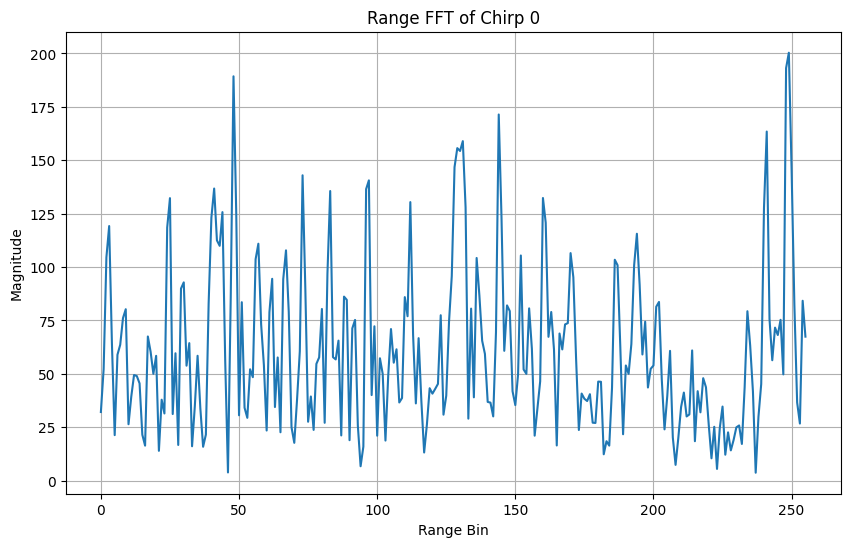

In [86]:
# Select a frame and RX channel
frame_idx = 0
rx_idx = 0

# Get all chirps for that frame and RX
chirp_data = chirps[:, :, frame_idx, rx_idx]                         # shape (samples, chirps)
chirp_data -= np.mean(chirp_data, axis=0, keepdims=True)             # remove DC
window = windows.hann(SAMPLES_PER_CHIRP).reshape(-1, 1)              # Hann window
chirp_data_windowed = chirp_data * window                            # apply window

# Apply FFT along the sample (fast time) axis
range_fft = fft(chirp_data_windowed, axis=0)                        # shape: (256, 128)

# Get the frequency axis in Hz
range_freqs = fftfreq(SAMPLES_PER_CHIRP, 1 / SAMPLE_RATE)

# Plot one chirp's range FFT
plt.figure(figsize=(10, 6))
plt.plot(np.abs(range_fft[:, 0]))  # e.g., first chirp
plt.title("Range FFT of Chirp 0")
plt.xlabel("Range Bin")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

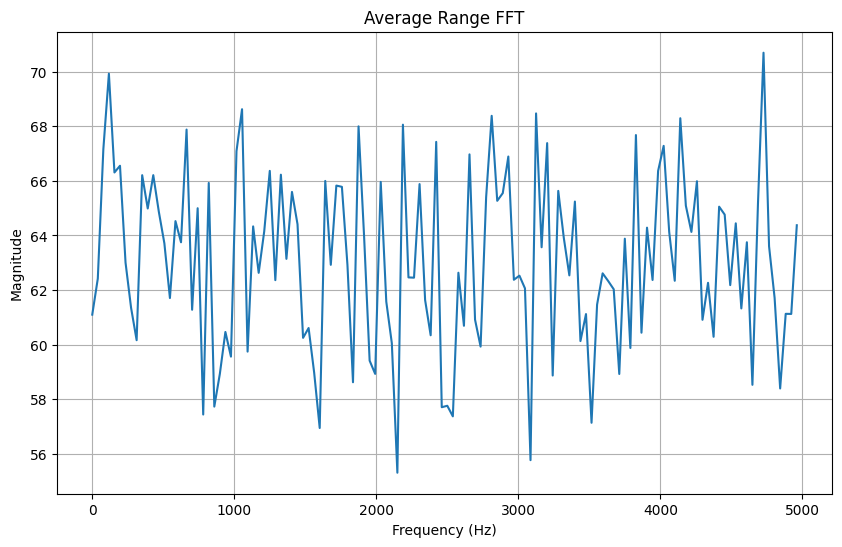

In [89]:
avg_range_fft = np.mean(np.abs(range_fft), axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range_freqs[:SAMPLES_PER_CHIRP // 2], avg_range_fft[:SAMPLES_PER_CHIRP // 2])
plt.title("Average Range FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)